# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [1]:
import pandas as pd
import numpy as np
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
import matplotlib.pyplot as plt

D:\Anaconda\envs\EPA_1361\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [8]:
df = pd.read_csv('data/Bryant et al 2010.csv',index_col=False)


,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.25,1,99.199997,511.600006,0.45,89.099998,0.363,-0.387,1.75,-0.015,170.500000,1995,74.22,265.56,0,0
878,0.25,1,102.400002,751.400024,0.91,86.800003,0.318,-0.471,0.75,0.023,96.199997,1996,35.97,163.70,0,0
879,0.25,1,100.000000,527.000000,0.59,91.099998,0.410,-0.567,0.22,0.062,137.100006,1997,35.96,200.64,0,0
880,0.25,1,108.300003,694.200012,0.65,99.800003,0.355,-0.368,1.62,0.017,145.399994,1998,41.42,126.74,0,0


In [21]:
x = df.iloc[:,2:11]#.to_records(index=False)
y = df.iloc[:, 15].values

In [60]:
Prim1 = prim.Prim(x,y,threshold = 0.8, peel_alpha=0.1)
box1 = Prim1.find_box()

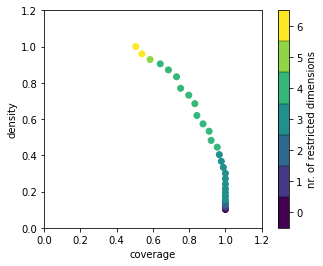

In [61]:
box1.show_tradeoff()
plt.show()

#### reflection
The resulting box tradeoff is logical. The prim algorythm iteratively divides the input space into smaller and smaller squares. As the dimensions get more restricted, the coverage of the total input space decreases. However this downside is mitigated by the increasing level of density in the remaining box. 
We can see that after the third dimension, diminishing returns in the density/coverage tradoff starts to occur.

coverage    0.752809
density     0.770115
id                21
mass        0.098639
mean        0.770115
res_dim            4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



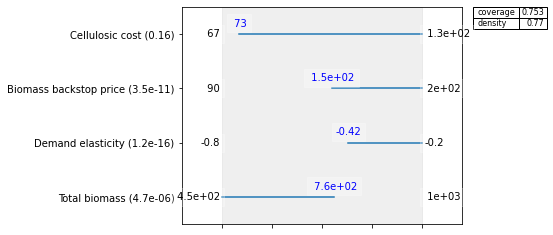

In [62]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

In [ ]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)

